https://stackoverflow.com/questions/13202799/python-code-geometric-brownian-motion-whats-wrong

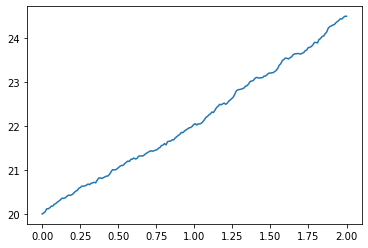

In [1]:
import matplotlib.pyplot as plt
import numpy as np

T = 2
mu = 0.1
sigma = 0.01
S0 = 20
dt = 0.01
N = round(T/dt)
t = np.linspace(0, T, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = (mu-0.5*sigma**2)*t + sigma*W 
S = S0*np.exp(X) ### geometric brownian motion ###
plt.plot(t, S)
plt.show()

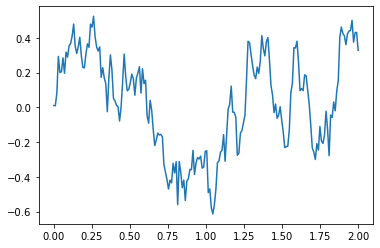

In [2]:
plt.plot(t,W)

# Make dgf10, dgf11 brownian

In [44]:

def plot_line(x,y, xlim=(-10,1500), ylim=(-100,500)):
    # x-axis is time, y-axis is amplitude.
    plt.plot(x,y) # x-axis is time, y-axis is amplitude.
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1]) # Set x and y limits so plot show same scale.

def add_noise(x):
    noise = np.random.normal(loc=0, scale=3.0, size=len(x))
    # noise = np.random.standard_normal(size=len(x))
    # See geometric brownian model
    # https://stackoverflow.com/questions/13202799/python-code-geometric-brownian-motion-whats-wrong
    
    # noise
    # pd.Series(noise).plot.hist(title='Noise: Size=%s Normal distribution' % SIM_DAYS, bins=50)
    x_noisy = x+noise
    return x, x_noisy
def add_noise_brownian(y, days, drift=0.01):
    T = days
    t = np.linspace(0,T,days)
    mu = np.mean(y)
    sigma = np.var(y)
    S0 = y[0]
    dt = drift
    W = np.random.standard_normal(size = days) 
    # plt.plot(np.linspace(0,T,days), W)
    # plt.plot(np.linspace(0,T,days), np.cumsum(W)*np.sqrt(dt))
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return t, S

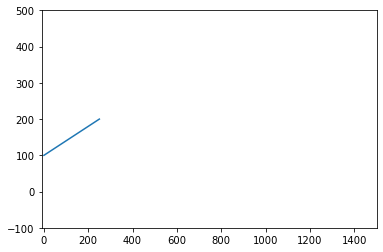

In [49]:
T_1 = 0

# Function 10: linear function
# Test: x,y = dgf10(); plot_line(x,y)
def dgf10(a=0, c=0, m=0.4, b=0, h=0, v=0, d=0, days=250, with_noise=False):
    # b is  y-axis start.
    x = np.linspace(T_1, T_1 + days, days)
    # Decompose the two axises https://math.stackexchange.com/questions/1803012/how-to-shift-a-line-in-a-graph-regardless-of-slope
    # and apply the shift separately.
    y = m * ( x - c ) + b + a
    # h-param is value to shift along horizontal (x-axis)
    y = y + v    
    # v-param is value to shift along vertical (y-axis)
    x = x + h
    
    if with_noise:
        x, x_noisy = add_noise(x)
        x = x_noisy # overwrite
    
    return x,y

def dgf11(a=1.8, b=150, h=0, v=0, d=0, days=250, with_noise=False):
    # b is  y threshold.
    x = np.linspace(T_1, T_1 + days, days)
    y = x ** a / 360 + b
    # h-param is value to shift along horizontal (x-axis)
    y = y + v    
    # v-param is value to shift along vertical (y-axis)
    x = x + h
    
    if with_noise:
        x, x_noisy = add_noise(x)
        x = x_noisy # overwrite
        
    return x,y

x,y = dgf10(b=100)
plot_line(x,y)

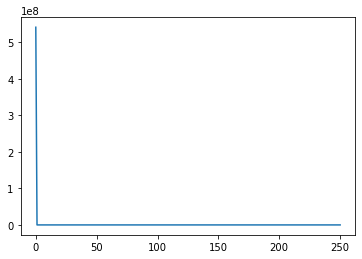

In [50]:
t, S = add_noise_brownian(y, days=250)
plt.plot(t, S)

In [48]:
S

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Packaged Function

in data/generator.py module

In [ ]:
# geometric brownian motion code from
# https://stackoverflow.com/questions/13202799/python-code-geometric-brownian-motion-whats-wrong

def make_gbm_series(start_price=20, days=250, mu=0.001, sigma=0.01):
    T = days # Days to simulate
    # mu = 0.001
    # sigma = 0.01
    S0 = start_price
    dt = 1
    N = round(T/dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return t, S # time index and price value
t, S = make_gbm_series(20,1200)
plt.plot(t, S)
plt.show()